<a href="https://colab.research.google.com/github/likhith8098/LIKHITH_FMML_LABS_PROJECTS/blob/main/multilinear_%26_Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression Multiple Variables**

**Sample problem of predicting home price in monroe, new jersey (USA)**

Below is the table containing home prices in monroe twp, NJ. Here price depends on **area (square feet), bed rooms and age of the home (in years).** Given these prices we have to predict prices of new homes based on area, bed rooms and age.

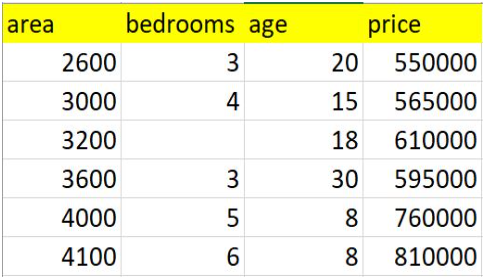

Given these home prices find out price of a home that has,

**3000 sqr ft area, 3 bedrooms, 40 year old**

**2500 sqr ft area, 4 bedrooms, 5 year old**

We will use regression with multiple variables here. Price can be calculated using following equation,

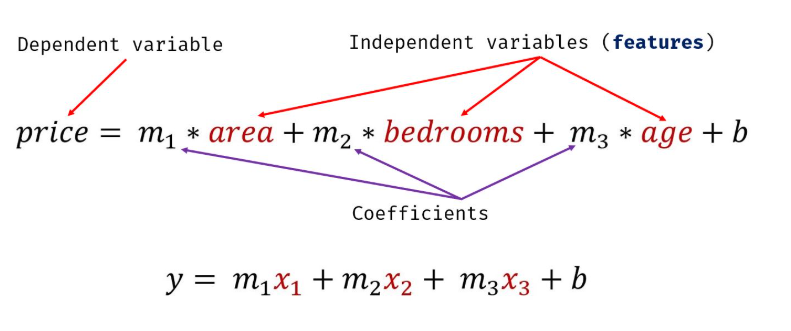

Here area, bedrooms, age are called independant variables or features whereas price is a dependant variable

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model


In [2]:
df = pd.read_csv('homeprices (1).csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


#**Data Preprocessing: Fill NA values with median value of a column**

In [3]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms
# median_bedrooms = df.bedrooms.median()
# median_bedrooms

4

In [4]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [5]:
a=df.drop("area", axis='columns')
a

,bedrooms,age,price
0,3.0,20,550000
1,4.0,15,565000
2,4.0,18,610000
3,3.0,30,595000
4,5.0,8,760000
5,6.0,8,810000


In [6]:
reg = linear_model.LinearRegression()
#fit use to train the model with traning set

reg.fit(df[['area','bedrooms','age']],df.price)

# reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression()

In [7]:
x=df.drop('price', axis='columns')
x

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [8]:
#m1, m2 ,m3
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [9]:
reg.intercept_
#intercept

np.float64(221323.00186540396)

#**Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old**

In [10]:
reg.predict([[3000, 3, 40]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [11]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

In [12]:
reg.predict([[2600, 3, 20]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([518217.63297611])

#**Exercise**

In exercise folder (same level as this notebook on github) there is **hiring.csv**. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

**2 yr experience, 9 test score, 6 interview score**

**12 yr experience, 10 test score, 10 interview score**

**Answer:**
53713.86 and 93747.79

In [13]:
!pip install word2number


  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=4dfc54b05edbb4990bf239a869493e5673653bc6a8040f56efddf82fde276aed
  Stored in directory: /root/.cache/pip/wheels/cd/ef/ae/073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number


In [14]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from word2number import w2n

In [15]:
d = pd.read_csv("hiring.csv")
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [16]:
d.experience = d.experience.fillna("zero")
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [17]:
d.experience = d.experience.apply(w2n.word_to_num)
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


#**complete the rest of the code....**
--------


# **Gradient Descent in Linear Regression**

## Why Use Gradient Descent in Linear Regression?

Linear regression is a way to draw the best-fit line for a set of data points. The goal is to make the difference between the predicted and actual values as small as possible. This difference is called **error**, and we try to minimize it using a **cost function** (like **Mean Squared Error**).

However, directly calculating the best-fit line (using formulas) works only for small data. For large datasets, or more complicated problems, it gets harder and slower. **Gradient Descent** is a technique that helps us find the best-fit line without these problems.

## When is Gradient Descent Useful?

- **Large datasets**: When you have lots of data, calculating the line directly is slow.
- **High-dimensional problems**: If you have more than one feature (like in polynomial regression), solving for the line gets complicated.
- **No simple formula**: Some models don’t have easy formulas to find the best parameters, and gradient descent helps in such cases.

## How Does Gradient Descent Work in Linear Regression?

1. **Start with Random Numbers**:  
   We begin with random guesses for the slope (**m**) and the intercept (**b**) of the line.

2. **Calculate the Cost (Error)**:  
   The cost function tells us how far off our line is from the actual data. One common cost function is **Mean Squared Error (MSE)**. It looks like this:



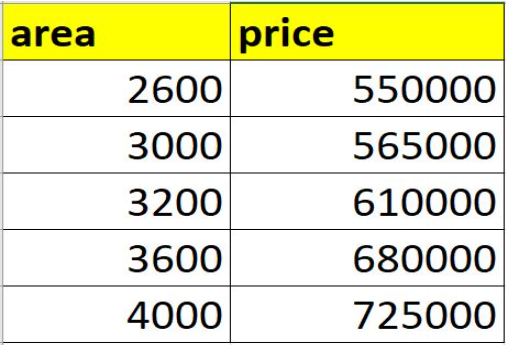

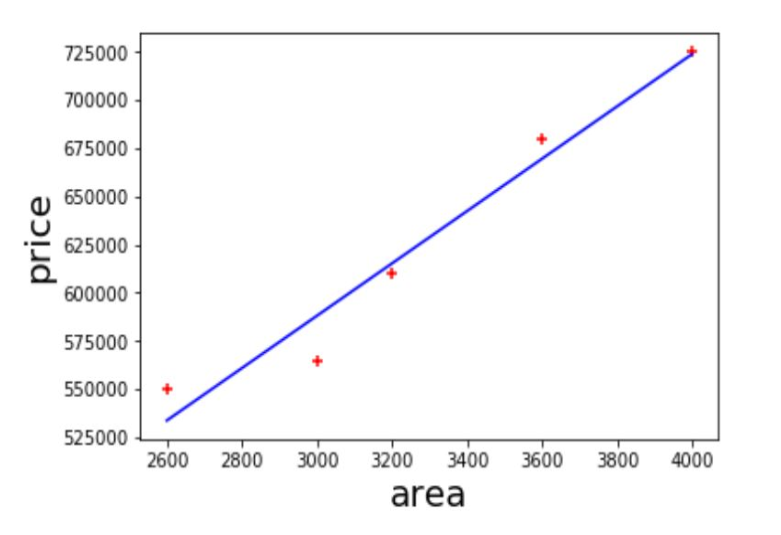

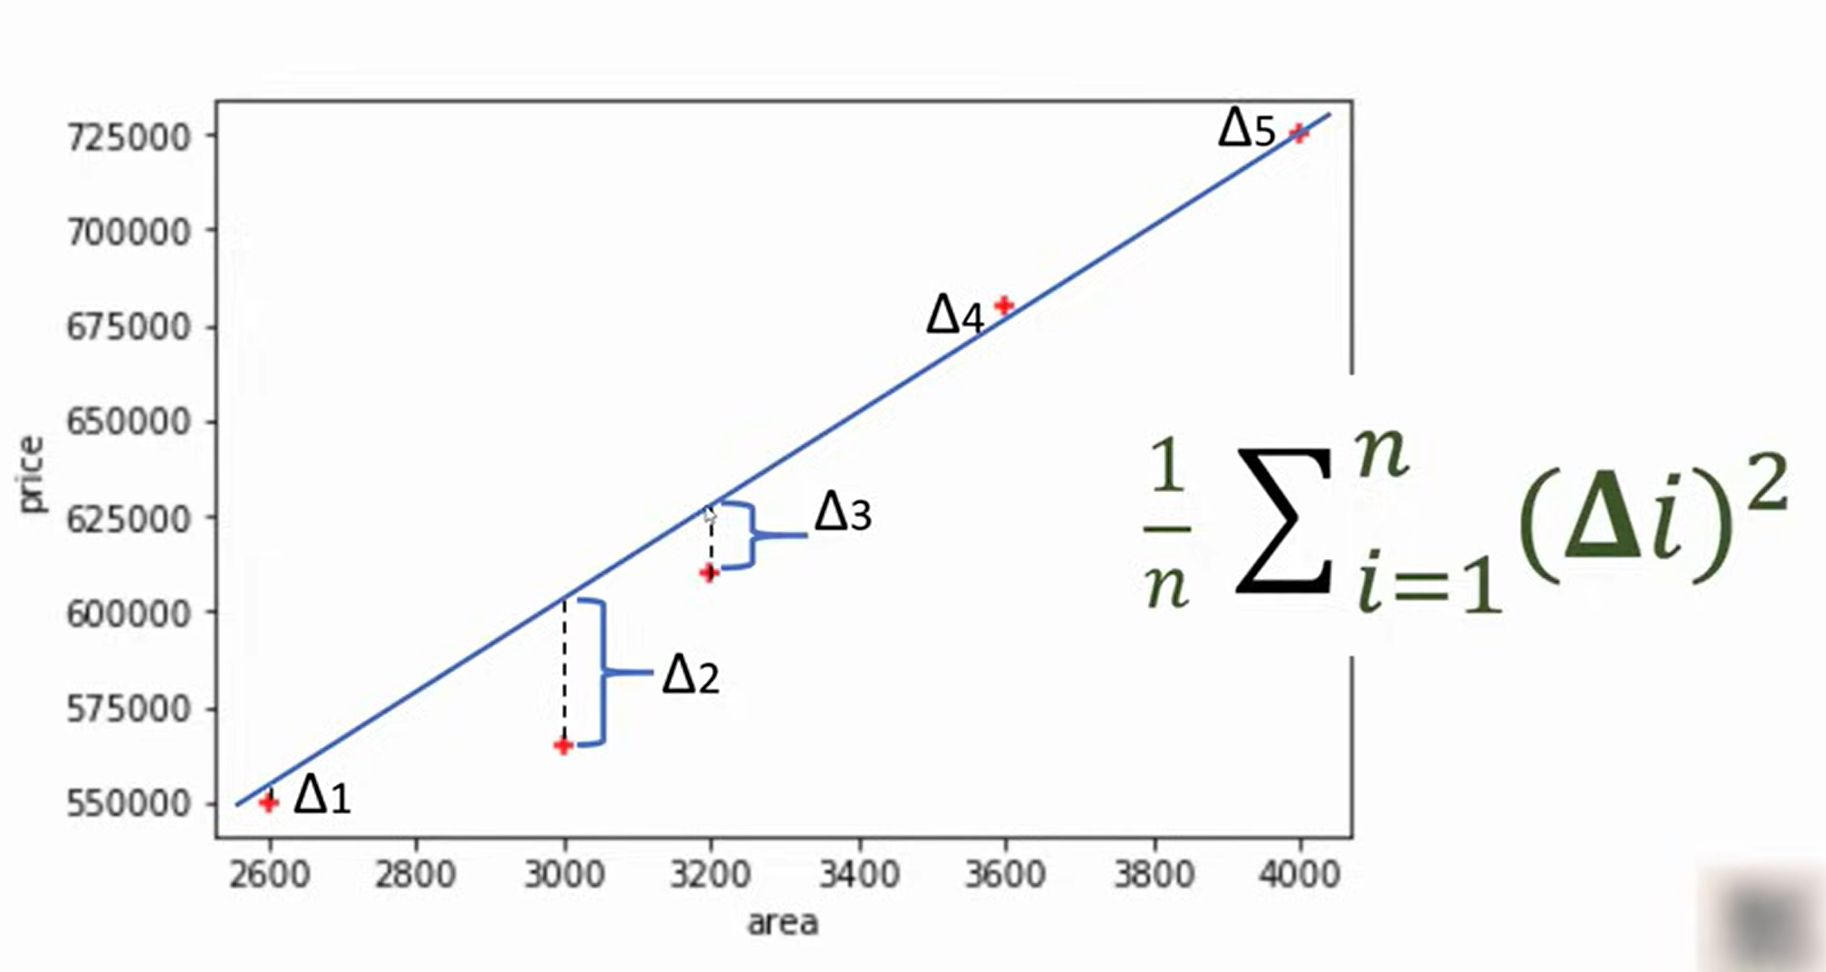


# **Steps of Gradient Descent **
#### 1. Initialize Parameters
- Start with random values for **slope (m)** and **intercept (b)**.



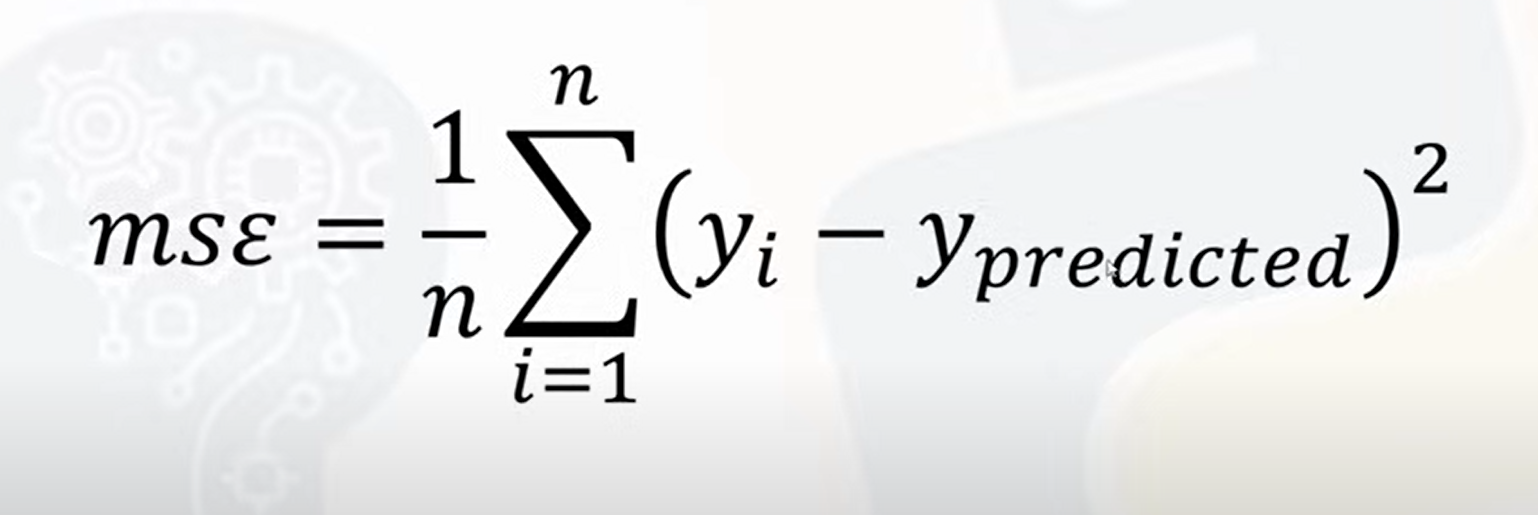

#### 2. Compute the Error (Cost Function)
- Use **Mean Squared Error (MSE)** to measure how far predictions are from actual values:
  
  **Cost Function Formula:**  
  \[ J(m, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (mx_i + b))^2 \]


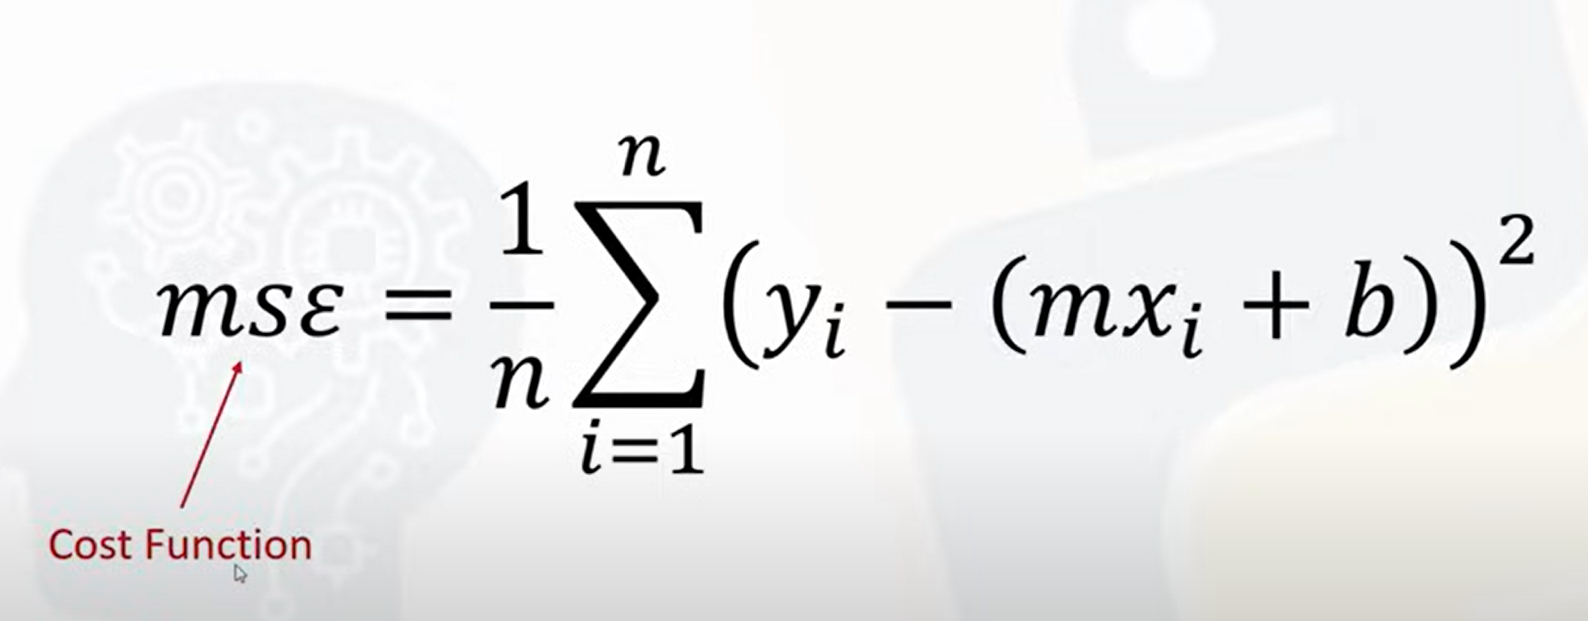

#### 3. Compute the Gradient (Direction of Change)
- Find how much the cost changes with respect to **m** and **b**.

  **For Slope (m):**  
  \[ \frac{\partial J}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} x_i (y_i - (mx_i + b)) \]
  
  **For Intercept (b):**  
  \[ \frac{\partial J}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (mx_i + b)) \]


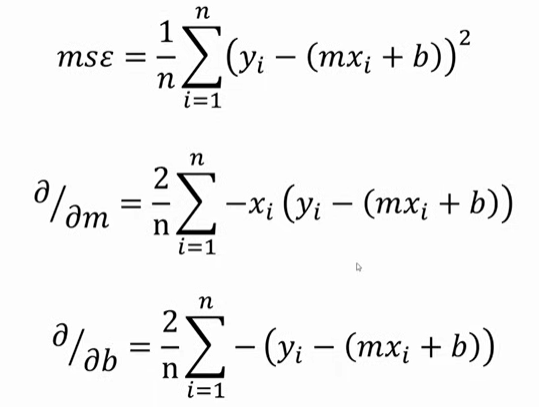

#### 4. Update Parameters
- Change **m** and **b** in the direction that reduces error:

  **Update Formulas:**  
  \[ m = m - \alpha \cdot \frac{\partial J}{\partial m} \]  
  \[ b = b - \alpha \cdot \frac{\partial J}{\partial b} \]  
  *(α is the learning rate, a small number to control the step size.)*

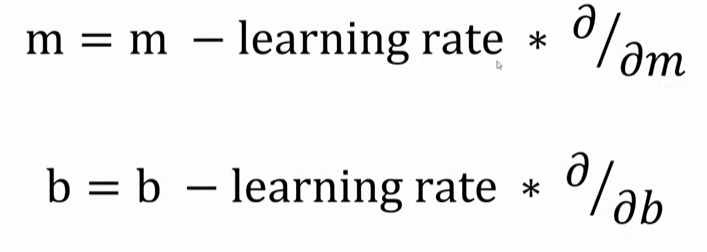

#### 5. Repeat Until Convergence
- Keep repeating the process until the error is very small and does not change much.

#**Practical Implemetation**

In [18]:
import numpy as np

In [19]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.01

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr #calculate predicted value mx+b
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted)) #m derivative
        bd = -(2/n)*sum(y-y_predicted)# B derivative
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)


m 0.62, b 0.18, cost 89.0 iteration 0
m 1.0928, b 0.3192, cost 52.25039999999999 iteration 1
m 1.453232, b 0.42724799999999996, cost 30.831949440000002 iteration 2
m 1.7278860800000002, b 0.5115091199999999, cost 18.347751350784 iteration 3
m 1.9370605952000002, b 0.5776057727999999, cost 11.070010749324897 iteration 4
m 2.096250917888, b 0.6298300216319999, cost 6.826353152519786 iteration 5
m 2.2172859146547204, b 0.6714583661260799, cost 4.350826141683065 iteration 6
m 2.309195511463117, b 0.7049920439242751, cost 2.9056952040975976 iteration 7
m 2.3788729763057748, b 0.7323404723580026, cost 2.0610450731046615 iteration 8
m 2.431580493177024, b 0.7549612843324961, cost 1.5663423003130599 iteration 9
m 2.471335107618129, b 0.7739672290552247, cost 1.2755882811903883 iteration 10
m 2.501203350198827, b 0.7902077780170325, cost 1.1037021437989751 iteration 11
m 2.523526146474063, b 0.8043314214447622, cost 1.0011028556851886 iteration 12
m 2.5400905089630834, b 0.8168332242274232, cos

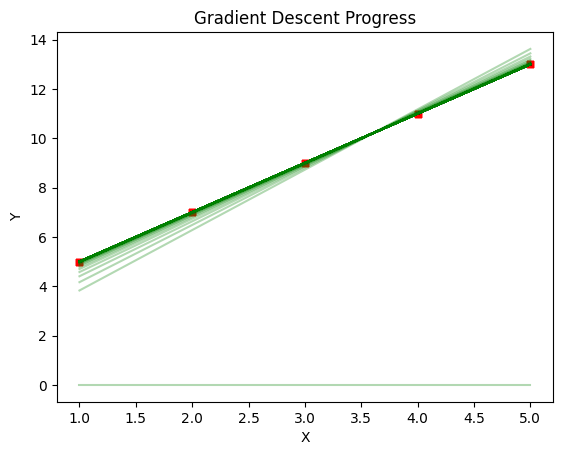

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x, y):
    m_curr = b_curr = 0
    rate = 0.01
    n = len(x)

    # Create a plot figure
    plt.figure()
    plt.scatter(x, y, color='red', marker='+', linewidth=5)

    for i in range(10000):
        # Prediction based on current values of m and b
        y_predicted = m_curr * x + b_curr

        # Plot the line for this iteration (append to the graph)
        if i % 100 == 0:  # To plot only every 100th iteration (optional)
            plt.plot(x, y_predicted, color='green', alpha=0.3)

        # Gradient calculations
        md = -(2/n) * sum(x * (y - y_predicted))
        yd = -(2/n) * sum(y - y_predicted)

        # Update the values of m and b using gradient descent
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Gradient Descent Progress')
    plt.show()

# Input data
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

# Run gradient descent
gradient_descent(x, y)
